# Assignment Day-21


## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
data=pd.read_excel("Linear Regression.xlsx")

In [3]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
data.tail()

,price,sqft_living,bedrooms,bathrooms,floors
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0
21612,325000,1020,2,0.75,2.0


In [5]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [7]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


## EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186524C0B48>,
      dtype=object)

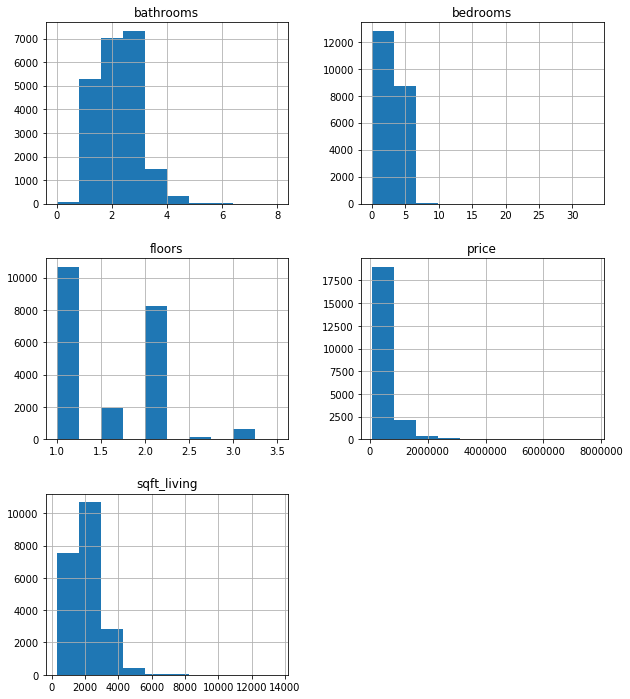

In [8]:
data.hist(figsize=(10,12))

In [9]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


Correlation between price and sqft_living

In [10]:
stats,p = pearsonr(data.price,data.sqft_living)
print('\nstats value :',stats,'\np-value :',p)
if stats == 0 :
    print('No correlation')
elif stats < 0 :
    print('Negative correlation')
else :
    print('Positive correlation')


stats value : 0.7020350524336835 
p-value : 0.0
Positive correlation


correlation between price and bedrooms

In [11]:
stats,p = pearsonr(data.price,data.bedrooms)
print('\nstats value :',stats,'\np-value :',p)
if stats == 0 :
    print('No correlation')
elif stats < 0 :
    print('Negative correlation')
else :
    print('Positive correlation')


stats value : 0.30834959788482247 
p-value : 0.0
Positive correlation


Correlation between price and bathrooms

In [12]:
stats,p = pearsonr(data.price,data.bathrooms)
print('\nstats value :',stats,'\np-value :',p)
if stats == 0 :
    print('No correlation')
elif stats < 0 :
    print('Negative correlation')
else :
    print('Positive correlation')


stats value : 0.5251375045796025 
p-value : 0.0
Positive correlation


Correlation between price and floors

In [13]:
stats,p = pearsonr(data.price,data.floors)
print('\nstats value :',stats,'\np-value :',p)
if stats == 0 :
    print('No correlation')
elif stats < 0 :
    print('Negative correlation')
else :
    print('Positive correlation')


stats value : 0.256793884063341 
p-value : 1.6e-322
Positive correlation


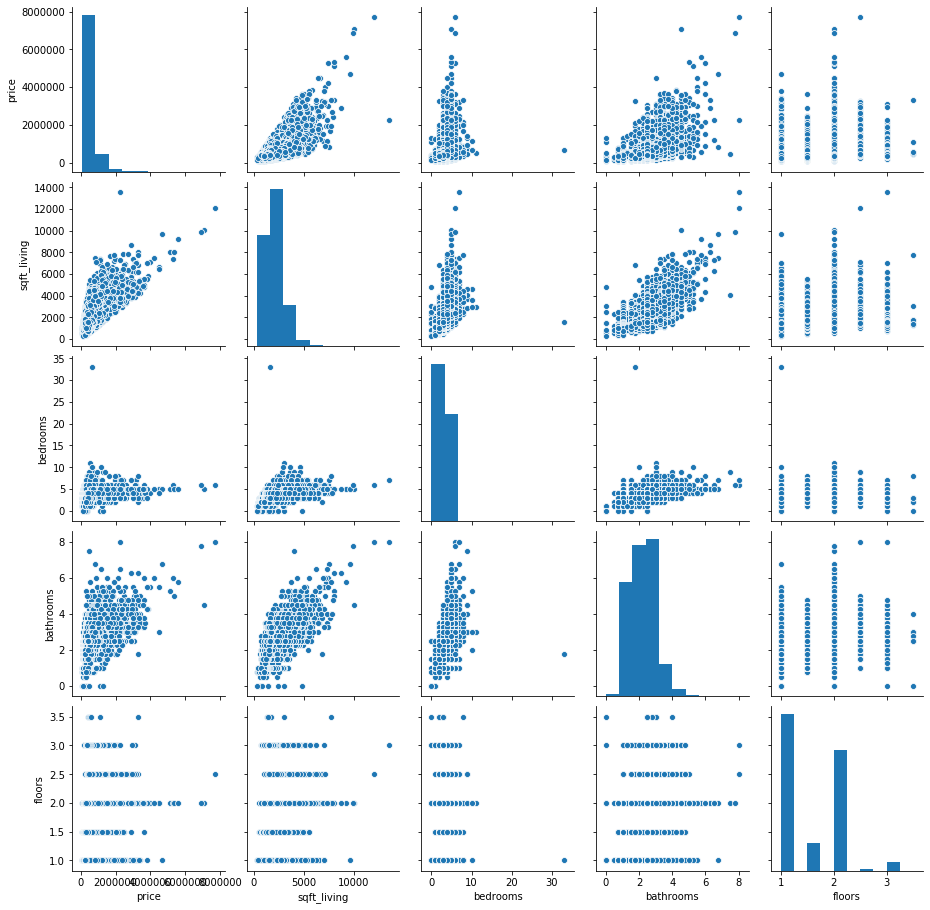

In [14]:
sns.pairplot(data)

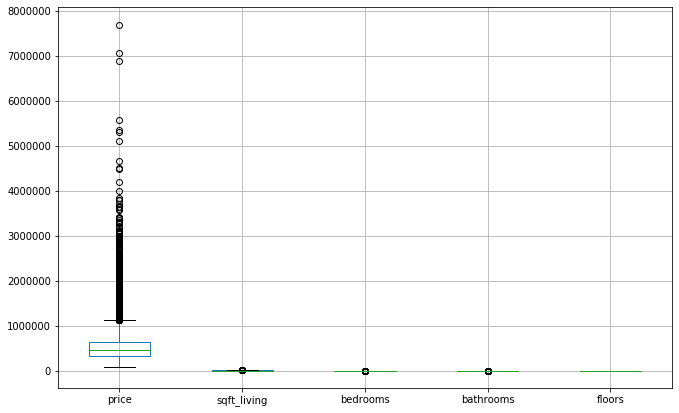

In [15]:
data.boxplot(figsize=(11,7))

## Checking null values

In [16]:
data.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

## Normalizing data

In [17]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
data1 = sc.fit_transform(data)
data1

array([[-0.86671733, -0.97983502, -0.39873715, -1.44746357, -0.915427  ],
       [-0.00568792,  0.53363434, -0.39873715,  0.1756067 ,  0.93650577],
       [-0.98084935, -1.42625404, -1.47395936, -1.44746357, -0.915427  ],
       ...,
       [-0.37586519, -1.15404732, -1.47395936, -1.77207762,  0.93650577],
       [-0.38158814, -0.52252773, -0.39873715,  0.50022075,  0.93650577],
       [-0.58588173, -1.15404732, -1.47395936, -1.77207762,  0.93650577]])

# Model-1: price Vs sqrt_living

### Assign the features to x & y

In [20]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [21]:
x=data.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [22]:
y=data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


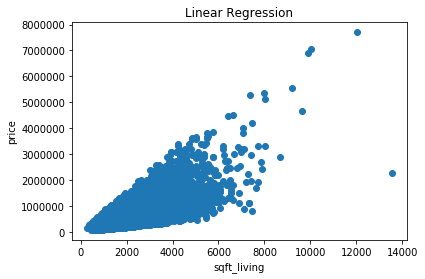

In [23]:
# visualize data
plt.scatter(x,y)
plt.title('Linear Regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

## Split the records for training and testing

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [25]:
data.shape

(21613, 5)

In [26]:
x_train.shape

(17290, 1)

In [27]:
x_test.shape

(4323, 1)

## Model building with sklearn

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

## Train the model

In [29]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin_reg.coef_

array([[280.67382569]])

In [31]:
lin_reg.intercept_

array([-42568.70358496])

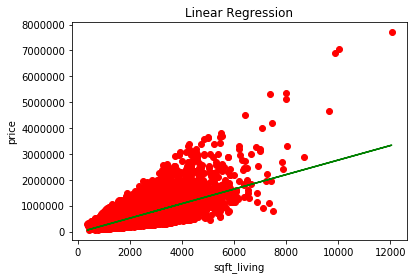

In [32]:
# Visualise Training set result
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train,lin_reg.predict(x_train), color = 'green')
plt.title('Linear Regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

## Test the model

In [33]:
ypred=lin_reg.predict(x_test)
ypred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

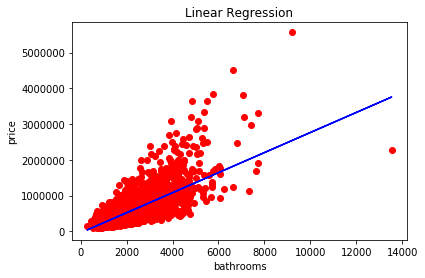

In [34]:
# Visualise Testing set result
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test,lin_reg.predict(x_test), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE = np.sqrt(mean_squared_error(y_test,ypred))
r_square = r2_score(y_test,ypred)
print('The value of RMSE is ...........',RMSE)
print('The value of R square is ...........',r_square)

The value of RMSE is ........... 263380.00189817196
The value of R square is ........... 0.5031163723285275


## Model-2 : price Vs bedrooms

In [36]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [37]:
x = data.iloc[:,2:3]
x.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [38]:
y = data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


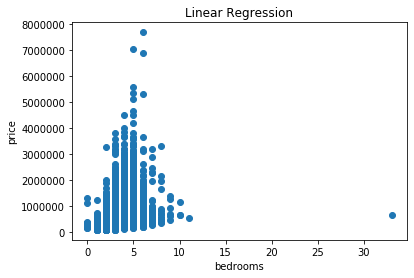

In [39]:
# visualize data
plt.scatter(x,y)
plt.title('Linear Regression')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [41]:
x_train.shape

(17290, 1)

In [42]:
x_test.shape

(4323, 1)

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [44]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lin_reg.coef_

array([[123535.45915908]])

In [46]:
lin_reg.intercept_

array([126751.84604781])

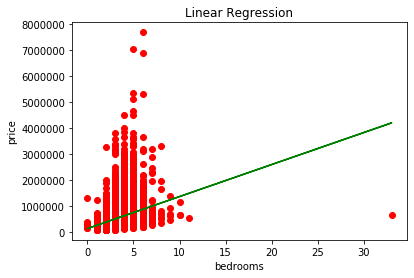

In [47]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train,lin_reg.predict(x_train), color = 'green')
plt.title('Linear Regression')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

In [48]:
ypred = lin_reg.predict(x_test)
ypred

array([[373822.76436597],
       [620893.68268414],
       [373822.76436597],
       ...,
       [497358.22352506],
       [497358.22352506],
       [497358.22352506]])

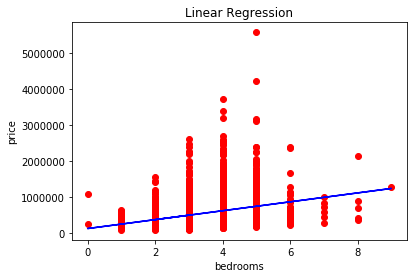

In [49]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test,lin_reg.predict(x_test), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE = np.sqrt(mean_squared_error(y_test,ypred))
r_square = r2_score(y_test,ypred)
print('The value of RMSE is ...........',RMSE)
print('The value of R square is........',r_square)

The value of RMSE is ........... 330690.0478733202
The value of R square is........ 0.08045757572566947


## Model-3 : price Vs bathrooms

In [52]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [54]:
x=data.iloc[:,3:4]
x.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [57]:
y=data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


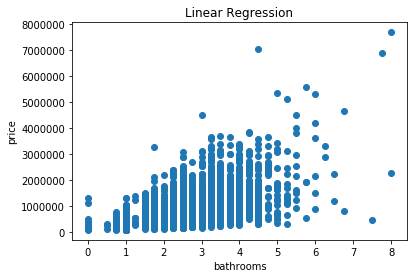

In [58]:
# visualize data
plt.scatter(x,y)
plt.title('Linear Regression')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [61]:
print(x_train.shape)
print(x_test.shape)

(17290, 1)
(4323, 1)


In [62]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
lin_reg.coef_

array([[253263.96384055]])

In [65]:
lin_reg.intercept_

array([6313.08347882])

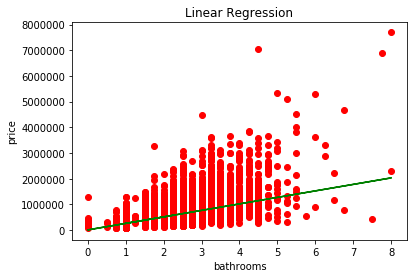

In [66]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train,lin_reg.predict(x_train), color = 'green')
plt.title('Linear Regression')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

In [67]:
ypred = lin_reg.predict(x_test)
ypred

array([[386209.02923965],
       [829420.96596062],
       [196261.05635924],
       ...,
       [639472.9930802 ],
       [259577.04731937],
       [576157.00212006]])

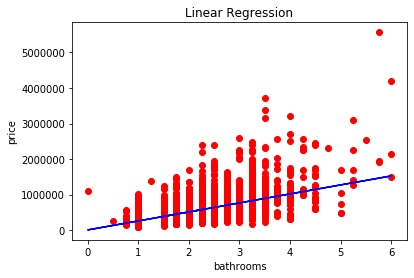

In [68]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test,lin_reg.predict(x_test), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

In [70]:
RMSE = np.sqrt(mean_squared_error(y_test,ypred))
r_square = r2_score(y_test,ypred)
print('The value of RMSE is ...........',RMSE)
print('The value of R square is........',r_square)

The value of RMSE is ........... 293733.1147146452
The value of R square is........ 0.2745034662728696


## Model-4 : price Vs floors

In [71]:
x=data.iloc[:,4:]
x.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [72]:
y=data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


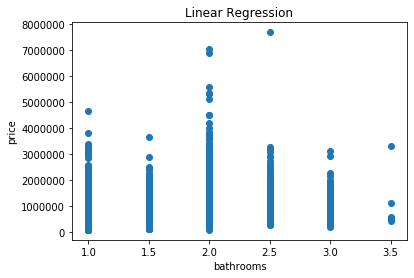

In [73]:
# visualize data
plt.scatter(x,y)
plt.title('Linear Regression')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [75]:
print(x_train.shape)
print(x_test.shape)

(17290, 1)
(4323, 1)


In [76]:
lin_reg=LinearRegression()

In [77]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
lin_reg.coef_

array([[174964.59154108]])

In [79]:
lin_reg.intercept_

array([280691.95125499])

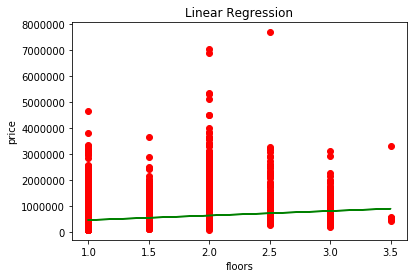

In [80]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train,lin_reg.predict(x_train), color = 'green')
plt.title('Linear Regression')
plt.xlabel('floors')
plt.ylabel('price')
plt.show()

In [81]:
ypred=lin_reg.predict(x_test)
ypred

array([[805585.72587823],
       [630621.13433715],
       [455656.54279607],
       ...,
       [630621.13433715],
       [543138.83856661],
       [455656.54279607]])

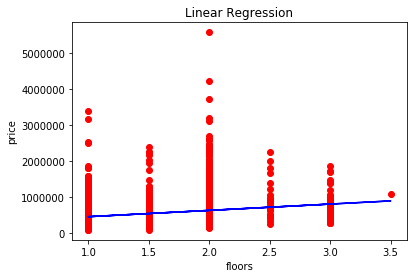

In [82]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test,lin_reg.predict(x_test), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('floors')
plt.ylabel('price')
plt.show()

In [83]:
RMSE = np.sqrt(mean_squared_error(y_test,ypred))
r_square = r2_score(y_test,ypred)
print('The value of RMSE is ...........',RMSE)
print('The value of R square is........',r_square)

The value of RMSE is ........... 332722.48429265054
The value of R square is........ 0.06911973999204302


# Multiple Regression

In [84]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [86]:
x=data.iloc[:,1:]
x.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [87]:
y=data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [92]:
x_train.shape

(17290, 4)

In [93]:
x_test.shape

(4323, 4)

In [91]:
mul_reg = LinearRegression()

In [94]:
mul_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
mul_reg.coef_

array([[   313.19378504, -56600.74916997,   5910.55508513,
          2453.13646507]])

In [96]:
mul_reg.intercept_

array([65340.2513231])

In [102]:
ypred=mul_reg.predict(x_test)

In [104]:
RMSE = np.sqrt(mean_squared_error(y_test, ypred))
r_square = r2_score(y_test, ypred)

print('The R square value is.........', r_square)
print('The RMSE value is.......', RMSE)

The R square value is......... 0.49571065104477097
The RMSE value is....... 244892.3041280654
